<a href="https://colab.research.google.com/github/kanikaghiloria/Hitograms-PCA-ComputerVision/blob/master/ComputerVision_Histograms_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install python-mnist

  Created wheel for python-mnist: filename=python_mnist-0.6-py2.py3-none-any.whl size=11662 sha256=ee924394c6d9456a7c49b3026c501f5524dabfa7a14211d1216e057277506d00
  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [0]:
from google.colab.patches import cv2_imshow
import cv2
import random
from matplotlib import pyplot as plt
import scipy.ndimage as ndi
import numpy as np
from sklearn.datasets import fetch_mldata
from mnist import MNIST
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Question 1-a: Read a RGB colour image (e.g. png)and display it

In [0]:
#Reading the RGB image
imgPath = "/content/drive/My Drive/Colab Notebooks/image.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image2.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image3.png"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image4.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image5.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image6.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image7.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image8.jpg"
# imgPath = "/content/drive/My Drive/Colab Notebooks/image9.jpg"

img = cv2.imread(imgPath)

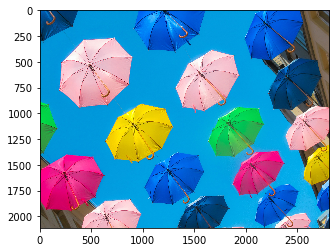

In [0]:
#Displaying image in default colourspace(BGR)
# plt.imshow(img)
# plt.show()

#Displaying the image in RGB colourspace
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [0]:
print (img.shape)

(2112, 2816, 3)


#Question 1-b:Convert the RGB image into Lab colour system and display each component (L,a,b) as a grey level image 


In [0]:
#Converting the image to LAB colour space
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

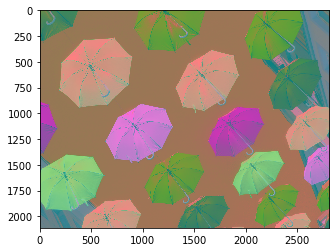

In [0]:
#Displaying image in LAB color space
plt.imshow(img_lab)
plt.show()

In [0]:
#splitting the image into L, A and B channels
l, a, b = cv2.split(img_lab)

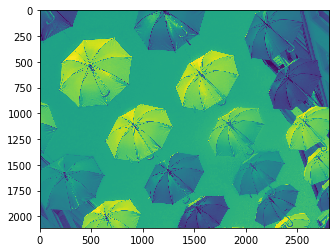

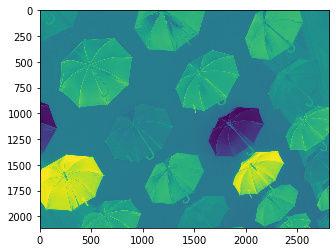

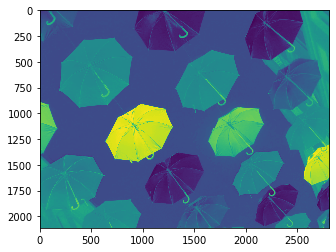

In [0]:
#Displaying the image in L, A and B channels
plt.imshow(l)
plt.show()
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()

Image in gray scale using 'L' components


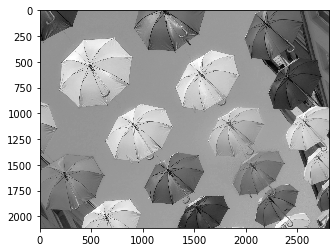

Image in gray scale using 'A' components


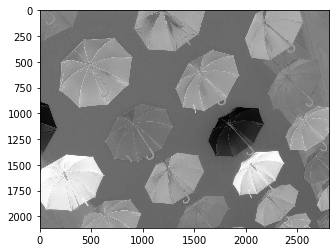

Image in gray scale using 'B' components


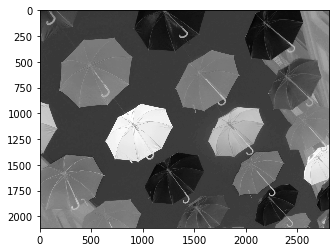

In [0]:
#Displaying l, a and B components as grey level images
print ("Image in gray scale using 'L' components")
plt.imshow(l, cmap='gray')
plt.show()
print ("Image in gray scale using 'A' components")
plt.imshow(a, cmap='gray')
plt.show()
print ("Image in gray scale using 'B' components")
plt.imshow(b, cmap='gray')
plt.show()

#Question 1-c: Compute the spatial derivatives of the luminance component L in the horizontal and vertical direction using convolution by the derivatives of Gaussian filter. Display each these derivatives as grey level images


In [0]:
#computing spatial derivatives using convolution by Gaussian Filter
l_gaussian_horizontal = ndi.gaussian_filter(l, sigma=1, order=[1,0], output = np.float64)
l_gaussian_vertical = ndi.gaussian_filter(l, sigma=1, order=[0,1], output = np.float64)

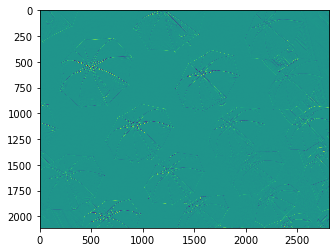

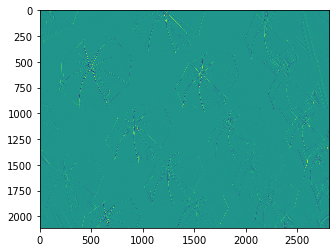

In [0]:
#Displaying derivatives
plt.imshow(l_gaussian_horizontal)
plt.show()
plt.imshow(l_gaussian_vertical)
plt.show()

Derivative of image in horizontal direction


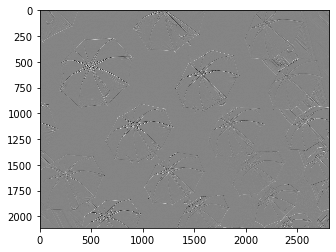

Derivative of image in vertical direction


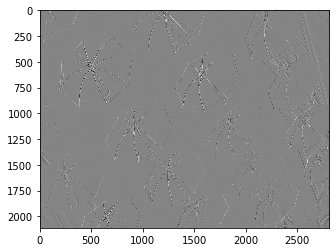

In [0]:
#Displaying the derivatives as grey level images
print ("Derivative of image in horizontal direction")
plt.imshow(l_gaussian_horizontal, cmap='gray')
plt.show()
print ("Derivative of image in vertical direction")
plt.imshow(l_gaussian_vertical, cmap='gray')
plt.show()

#Question 1-d: Compute a 2D histogram with the chrominance component (a,b) and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot)

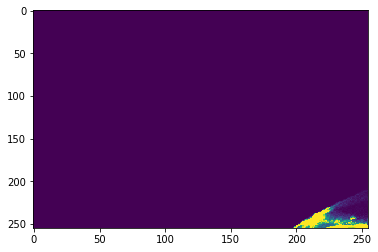

In [0]:
#Calculating 2D histogram with chrominance components
hist_2d = cv2.calcHist([img_lab],[1,2],None, [255,255], [-128, 128, -128, 128])
# print ()
plt.imshow(hist_2d, vmin=0, vmax=255, aspect='auto')
plt.show()

In [0]:
print (img_lab.shape)
print (l.shape)
print (a.shape)
print (b.shape)
# print(l)
# print(a)
# print(b)

(2112, 2816, 3)
(2112, 2816)
(2112, 2816)
(2112, 2816)


In [0]:
a_new = np.asarray(a[0])
b_new = np.asarray(b[1])
print (a_new.shape)
print (b_new.shape)

(2816,)
(2816,)


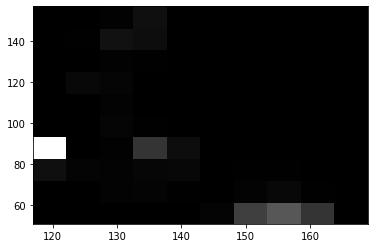

In [0]:
#Plotting 2D histogram as heat map
#plt.plot(hist_2d)
plt.hist2d(a_new,b_new, cmap='gray')
#plt.colorbar()
plt.show()

#Question 1-e: Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image

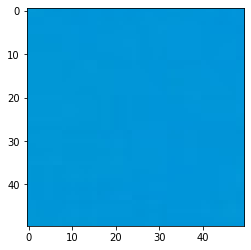

In [0]:
#splitting the part of the image
x=0
y=500
height = 50
width = 50
img_part = img[y:y+height, x:x+width]
#img_part = img[y:y+height, x:x+width]
plt.imshow(img_part, )
plt.show()

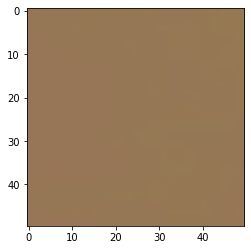

In [0]:
img_part = cv2.cvtColor(img_part, cv2.COLOR_RGB2LAB)
plt.imshow(img_part)
plt.show()

In [0]:
#Splitting part image in l, a and b channels
# l_part, a_part, b_part = cv2.split(img_part)
# plt.imshow(l_part)
# plt.show()
# plt.imshow(a_part)
# plt.show()
# plt.imshow(b_part)
# plt.show()

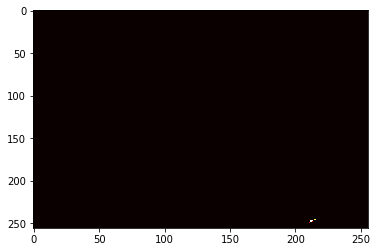

In [0]:
#Computing histogram of part image
hist_2d_part = cv2.calcHist([img_part],[1,2],None, [256,256], [-128, 128, -128, 128])
plt.imshow(hist_2d_part, cmap='hot', vmin=0, vmax=255, aspect='auto')
plt.show()

Back Projection Map


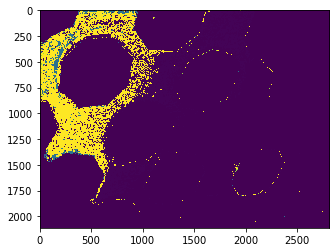

In [0]:
#Computing back projection map
back_projection = cv2.calcBackProject([img_lab],[1,2],hist_2d_part,[-128, 128, -128, 128], 1)
print ("Back Projection Map")
plt.imshow(back_projection)
plt.show()

Final output:


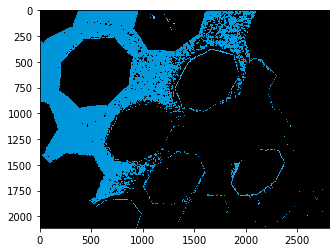

In [0]:
# Removing the noise from back projection Map
# convoluting with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(back_projection, -1, disc, back_projection)
cv2.normalize(back_projection, back_projection, 0,255,cv2.NORM_MINMAX)
# Thresholding to segment out the region
ret,thresh = cv2.threshold(back_projection,10,255,0)
# Overlay images using bitwise_and
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(img,thresh)
 
# Displaying the output

print ("Final output:")
plt.imshow(res)
plt.show()

#Question 1-f: Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast 

Image 1: without histogram equalisation
Image 2: with histogram equalisation


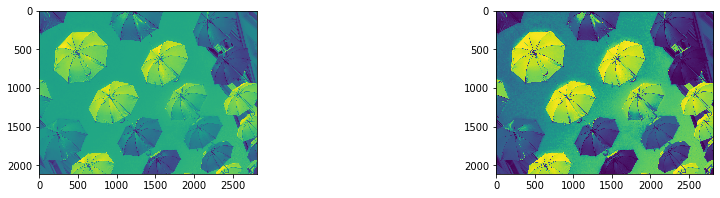

In [0]:
#Histogram Equalisation
hist_eq = cv2.equalizeHist(l)
f=plt.figure(figsize = (15,3))
f.add_subplot(1,2,1)
plt.imshow(l)
f.add_subplot(1,2,2)
print ("Image 1: without histogram equalisation")
print ("Image 2: with histogram equalisation")
plt.imshow(hist_eq)
plt.show()


#Question 1-g: Evaluate the performance of these techniques with histograms

Image in RGB format


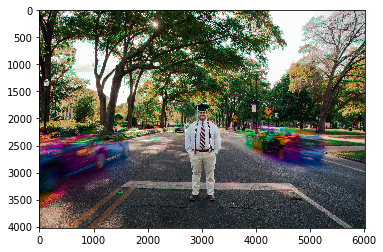

Image in LAB format


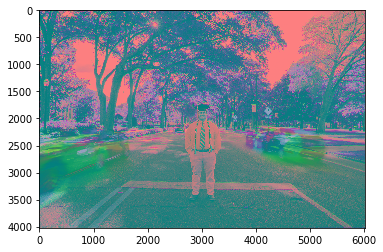

In [0]:
# Reading another image for illustration
imgPathIllustrate = "/content/drive/My Drive/Colab Notebooks/image4.jpg"
img_illustrate = cv2.imread(imgPathIllustrate)

# Converting the image to RGB format
img_illustrate = cv2.cvtColor(img_illustrate, cv2.COLOR_BGR2RGB)
print("Image in RGB format")
plt.imshow(img_illustrate)
plt.show()
img_illustrate_lab = cv2.cvtColor(img_illustrate, cv2.COLOR_RGB2LAB)
print("Image in LAB format")
plt.imshow(img_illustrate_lab)
plt.show()

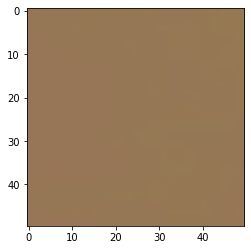

In [0]:
#splitting the part of the image and converting it into LAB color space
x=4000
y=3500
height = 50
width = 50
img_illustrate_part = img_illustrate[y:y+height, x:x+width]
img_illustrate_part = cv2.cvtColor(img_illustrate_part, cv2.COLOR_RGB2LAB)
plt.imshow(img_part)
plt.show()

Back Projection Map


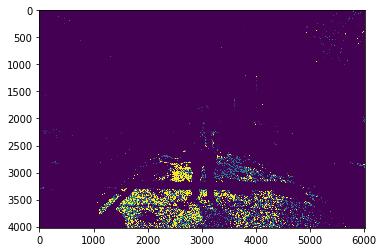

In [0]:
# Calculation histogram for the complete image and it's part
hist_2d = cv2.calcHist([img_illustrate_lab],[1,2],None, [255,255], [-128, 128, -128, 128])
hist_2d_part = cv2.calcHist([img_illustrate_part],[1,2],None, [250,250], [-128, 128, -128, 128])
# plt.imshow(hist_2d_part, cmap='hot', vmin=0, vmax=255, aspect='auto')
# plt.show()
# # print ()
# # plt.imshow(hist_2d, vmin=0, vmax=255, aspect='auto')
# # plt.show()

back_projection = cv2.calcBackProject([img_illustrate_lab],[1,2],hist_2d_part,[-128, 128, -128, 128], 1)
print ("Back Projection Map")
plt.imshow(back_projection)
plt.show()

Final output of back propogation:


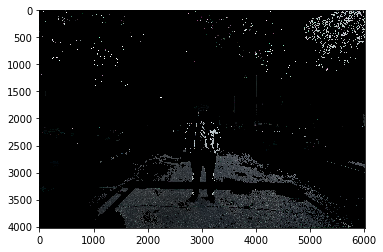

In [0]:
# Removing the noise from back projection Map
# convoluting with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(back_projection, -1, disc, back_projection)
# back_projection = np.unit8(back_projection)
cv2.normalize(back_projection, back_projection, 0,255,cv2.NORM_MINMAX)
# Thresholding to segment out the region
ret,thresh = cv2.threshold(back_projection,10,255,0)
# Overlay images using bitwise_and
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(img_illustrate,thresh)
 
# Displaying the output

print ("Final output of back propogation:")
plt.imshow(res)
plt.show()

The output of back propagation is clear abd better in 1-e when compared to 1-g. The method works perctly well wheh the input image has clear edges and distincts objects set in the background. It does not seem to work for the images which do not fulfill these conditions

#Question 2-a: Compute the mean image and principal components for a set of images (e.g. use the. Display the mean image and the first 2 principal components 

In [0]:
# Loading MNIST dataset
path = '/content/drive/My Drive/Colab Notebooks/MNIST datasets'
dataset = MNIST(path)
x_train_orig, y_train_orig = dataset.load_training()
x_test_orig, y_test_orig = dataset.load_testing()

In [0]:
#Displaying the image and label
index = random.randrange(0, len(x_train_orig)) 
# print(dataset.display(x_train_orig[index]))
# print ("index: ", y_train_orig[index])
# plt.imshow(np.array(x_train_orig[index]).reshape(28,28))
# plt.show()

In [0]:
# Storing the data as numpy arrays
x_train_orig = np.array(x_train_orig)
y_train_orig = np.array(y_train_orig)
x_test_orig = np.array(x_test_orig)
y_test_orig = np.array(y_test_orig)

In [0]:
#filtering out the images only with digit num
num = 1
train_filter = np.where(y_train_orig == num)
test_filter = np.where(y_test_orig == num)
x_train, y_train = x_train_orig[train_filter], y_train_orig[train_filter]
x_test, y_test = x_test_orig[test_filter], y_test_orig[test_filter]

In [0]:
# Displaying a number from the dataset to test
# index = random.randrange(0, len(x_train)) 
# print ("index: ", index)
# # print(dataset.display(x_train[index]))

# print (y_train[index])
# plt.imshow(x_train[index].reshape(28,28))
# plt.show()

In [0]:
# Standardising the data
# sc = StandardScaler() 
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

# print (x_train_scaled)

In [0]:
pca = PCA()
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

principalComponents = pca.components_
# print (principalComponents[0].shape)
# print (principalComponents[1].shape)

Mean Image


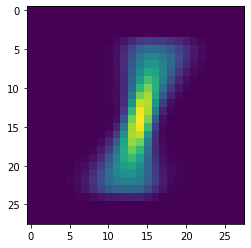

In [0]:
# Displaying Mean Image
print ("Mean Image")
plt.imshow(pca.mean_.reshape(28,28))
plt.show()

Image obtained from 1st principal component


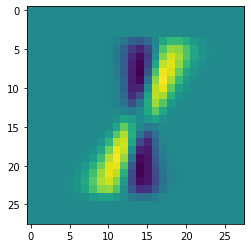

Image obtained from 2nd principal component


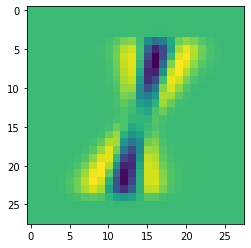

In [0]:
# Displaying the images with first two principal components
print ("Image obtained from 1st principal component")
plt.imshow(principalComponents[0].reshape(28,28))
plt.show()
print ("Image obtained from 2nd principal component")
plt.imshow(principalComponents[1].reshape(28,28))
plt.show()


## Question 2-b: Compute and display the reconstructions of a test image using the mean image and with p principal components associated with the p highest eigenvalues (e.g. Fig 10.12) with p=10 and p=50.

In [0]:
# Calculating PCA with number of components in p_values[]

# p_values = [10, 50, 200, 400, 550, 784]
p_values = [10, 50]
x_train_list=[] # List will store the training data for all p values after PCA is applied to it
x_test_list=[] # List will store the test data for all p values after PCA is applied to it
pca_objects = [] # List will store PCA objects for different p values
lenP = len(p_values)

for p in p_values:
  pca_temp = PCA(n_components=p)
  pca_x_train_temp = pca_temp.fit_transform(x_train)
  pca_x_test_temp = pca_temp.transform(x_test)
  x_train_list.append(pca_x_train_temp)
  x_test_list.append(pca_x_test_temp)
  pca_objects.append(pca_temp)

# print ("Length of p_values[]: ",lenP)
# print ("Length of x_train_list[]: ", len(x_train_list))
# print ("Length of x_test_list[]: ",len(x_test_list))
# print ("Length of pca_objects[]: ",len(pca_objects))

Images reconstructed from testing dataset when principal components =  10


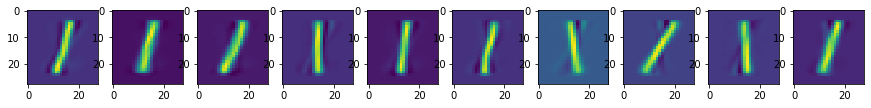

Images reconstructed from testing dataset when principal components =  50


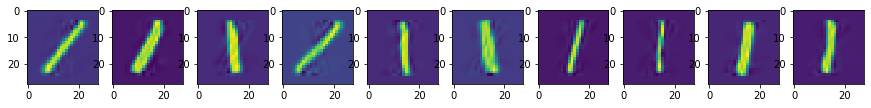

In [0]:
#Reconstructing the test image with components in p_values
# imgReconstruct = pca10.inverse_transform(pca10_x_test)

for p in range(lenP):
  imgReconstruct = pca_objects[p].inverse_transform(x_test_list[p])
  f=plt.figure(figsize = (15,3))
  print ("Images reconstructed from testing dataset when principal components = ", p_values[p])
  for x in range(10):
    index = random.randrange(0, len(x_test))
    f.add_subplot(2, 10, x+1)
    # print ("Images from training dataset")
    plt.imshow(imgReconstruct[index].reshape(28,28), aspect='auto')
  plt.show()

#Question 2 - c: Compute and display a DFFS (distance-from feature-space)and SSD (sum-of-square-differences) heat maps for detection using your PCA representation of a MNIST number

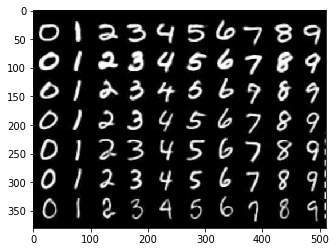

(380, 512, 3)


In [0]:
# Reading the test/target image
testImagePath = "/content/drive/My Drive/Colab Notebooks/compositeImage.PNG"

testImg = cv2.imread(testImagePath)
plt.imshow(testImg)
plt.show()
print (testImg.shape)

In [0]:
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2GRAY)
dimension = (28*10, 28*7)

# Resizing the image
testImg = cv2.resize(testImg, dimension, interpolation = cv2.INTER_AREA )
print (testImg.shape)

(196, 280)


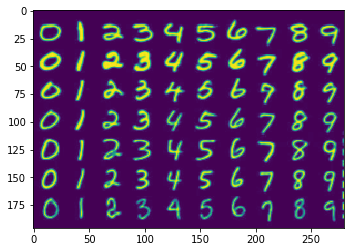

In [0]:
plt.imshow(testImg)
plt.show()

In [0]:
import scipy.spatial.distance as dist

In [0]:
# Assigning dimensions of mean image to window variable
window = pca.mean_.reshape(28,28).shape
print (window)

(28, 28)


In [0]:
# Funtion to compute SSD between two images and Sum them
def computeSSD(img, meanImg):
  distance = dist.cdist(img, meanImg, 'euclidean') **2
  # distance = (img-meanImg) **2
  total = np.sum(distance)
  return total

In [0]:
ssd = np.empty((7,10))
temp = np.zeros((28,28))
ctr_x=0
# pca_img = pca.inverse_transform(pca_x_test[1])
for i in range(ssd.shape[0]):
# for i in range(2):
  # ctr_x =0
  ctr_y=0
  for j in range(ssd.shape[1]):
    temp = testImg[ctr_x:(ctr_x+window[0]) , ctr_y:(ctr_y+window[1])]
    distanceSum = computeSSD(temp, pca.mean_.reshape(28,28))
    # distanceSum = computeSSD(temp, pca_img[1].reshape(28,28))
    # print ("distance type = ", distanceSum)
    ssd[i,j] = distanceSum
    ctr_y = ctr_y + window[1]
    # ctr_y = ctr_y + 28
    # print ("ctr_y : ", ctr_y)
  ctr_x = ctr_x + window[0]
# print (ssd.shape)

Displaying SSD heatmap


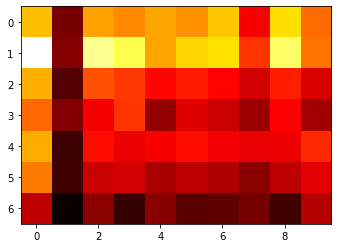

In [0]:
# Displaying SSD heatmap
print ("Displaying SSD heatmap")
plt.imshow(ssd, cmap='hot')
plt.show()

In [0]:
# print (principalComponents.shape)

In [0]:
# Calculating DFFS
def calcSumOfComponents(component):
  arr =np.zeros((784,784))
  sum = np.zeros((len(component[0]),1))
  for i in range(len(component[0])):
  # for i in range(2):
    temp =0
    for j in range(len(component[1])):
    # for j in range(2):
      arr[i][j] = component[i][j] **2
      # print ("arr[",i,",",j,"]",arr[i][j])
      temp = temp+arr[i][j]
    sum[i][0] = temp
  return sum

In [0]:
sum = calcSumOfComponents(principalComponents)
# print (sum.shape)

In [0]:
dffs = np.zeros((7,10))
temp = np.zeros((28,28))
ctr_x=0
for i in range(ssd.shape[0]):
  ctr_y=0
  for j in range(ssd.shape[1]):
    temp = testImg[ctr_x:(ctr_x+window[0]) , ctr_y:(ctr_y+window[1])]
    distanceSum = computeSSD(temp, pca.mean_.reshape(28,28)) - sum[1]
    # distanceSum = computeSSD(temp, (pca.inverse_transform(x_test[100])).reshape(28,28)) - sum[1]
    # print ("distance type = ", distanceSum)
    dffs[i,j] = distanceSum
    ctr_y = ctr_y + window[1]
  ctr_x = ctr_x + window[0]


Displaying heatmap of DFFS


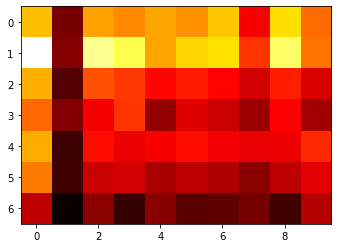

In [0]:
print ("Displaying heatmap of DFFS")
plt.imshow(dffs, cmap='hot')
plt.show()

#Question 2-d: Evaluate the performance of SSD and DFFS 

In [0]:
# Filtering the dataset for the images of 0
num = 0
train_filter = np.where(y_train_orig == num)
test_filter = np.where(y_test_orig == num)
x_train, y_train = x_train_orig[train_filter], y_train_orig[train_filter]
x_test, y_test = x_test_orig[test_filter], y_test_orig[test_filter]
print ("Shape of x_train: ", x_train.shape)
print ("Shape of y_train: ",y_train.shape)
print ("Shape of x_test: ",x_test.shape)
print ("Shape of y_test: ", y_test.shape)

Shape of x_train:  (5923, 784)
Shape of y_train:  (5923,)
Shape of x_test:  (980, 784)
Shape of y_test:  (980,)


In [0]:
# Displaying a random number from dataset
# index = random.randrange(0, len(x_train)) 
# print ("index: ", index)
# # print(dataset.display(x_train[index]))

# print (y_train[index])
# plt.imshow(x_train[index].reshape(28,28))
# plt.show()

In [0]:
pca = PCA()
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)
pca_img = pca.inverse_transform(pca_x_test)
principalComponents = pca.components_

In [0]:
# plt.imshow(pca.inverse_transform(pca_x_test[1]).reshape(28,28))
# plt.show()

In [0]:
# Computing SSD
ssd1 = np.empty((7,10))
temp = np.zeros((28,28))
ctr_x=0
for i in range(ssd.shape[0]):
# for i in range(2):
  # ctr_x =0
  ctr_y=0
  for j in range(ssd.shape[1]):
    temp = testImg[ctr_x:(ctr_x+window[0]) , ctr_y:(ctr_y+window[1])]
    distanceSum = computeSSD(temp, pca.mean_.reshape(28,28))
    # distanceSum = computeSSD(temp, (pca.inverse_transform(pca_x_test[1])).reshape(28,28))
    # print ("distance type = ", distanceSum)
    ssd1[i,j] = distanceSum
    ctr_y = ctr_y + window[1]
    # ctr_y = ctr_y + 28
    # print ("ctr_y : ", ctr_y)
  ctr_x = ctr_x + window[0]

Displaying SSD


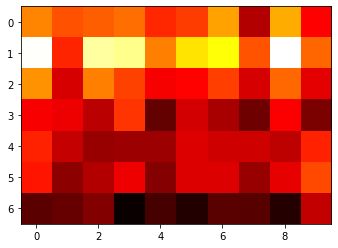

In [0]:
print ("Displaying SSD")
plt.imshow(ssd1, cmap='hot')
plt.show()

Displaying heatmap of DFFS


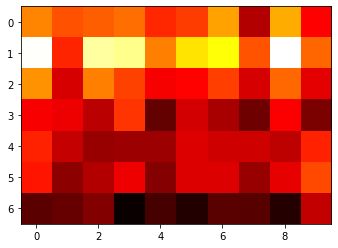

In [0]:
# Computing DFFS
sum = calcSumOfComponents(principalComponents)

dffs1 = np.zeros((7,10))
temp = np.zeros((28,28))
ctr_x=0
for i in range(ssd.shape[0]):
  ctr_y=0
  for j in range(ssd.shape[1]):
    temp = testImg[ctr_x:(ctr_x+window[0]) , ctr_y:(ctr_y+window[1])]
    distanceSum = computeSSD(temp, pca.mean_.reshape(28,28)) - sum[1]
    # distanceSum = computeSSD(temp, (pca.inverse_transform(x_test[100])).reshape(28,28)) - sum[1]
    # print ("distance type = ", distanceSum)
    dffs1[i,j] = distanceSum
    ctr_y = ctr_y + window[1]
  ctr_x = ctr_x + window[0]

print ("Displaying heatmap of DFFS")
plt.imshow(dffs1, cmap='hot')
plt.show()

It has been observed (and can be concluded from the above example)that SSD and DFFS are giving good results for images resembling digit 1. But they are not giving correct results for images of digit '0'

#Refrences

https://www.learnopencv.com/tag/scikit-learn/
https://www.geeksforgeeks.orgpython-visualizing-image-in-different-color-spaces/
https://docs.scipy.org/doc/scipy/reference/generatedscipy.ndimage.gaussian_filter.html
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorialspy_imgproc/py_filtering/py_filtering.html
https://opencv-python-tutroals.readthedocs.io/en/latest/
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
https://stackoverflow.com/questions/2284611/sum-of-square-differences-ssd-in-numpy-scipy
https://scikit-learn.org/stable/
https://theailearner.com/2019/04/18/histogram-backprojection/